In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


path_cancer = '/content/drive/MyDrive/MachineLearning/cancer.csv'
df = pd.read_csv(path_cancer)

In [3]:
df=df.drop(['Unnamed: 32'],axis=1)

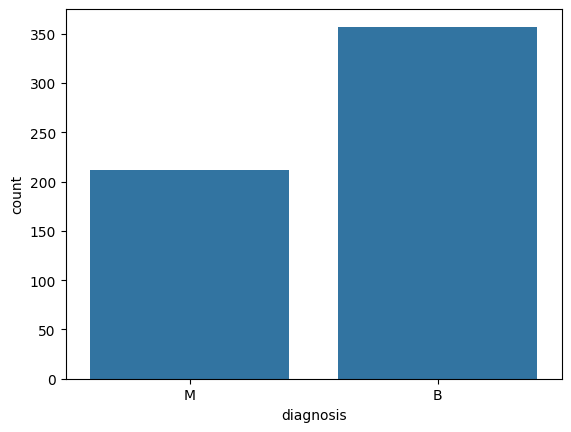

In [4]:
sns.countplot(x='diagnosis',data=df)
plt.show()

In [5]:
#Target Value
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [6]:
#Split the data
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#Initialize
rf= RandomForestClassifier(random_state=42)
gb= GradientBoostingClassifier(random_state=42)
svm= SVC(random_state=42)

In [9]:
#Train the model
rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [10]:
from sklearn.ensemble import HistGradientBoostingClassifier
gb= HistGradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

HistGradientBoostingClassifier(random_state=42)

In [11]:
#Prediction
rf_pred = rf.predict(X_test_scaled)
gb_pred = gb.predict(X_test_scaled)
svm_pred = svm.predict(X_test_scaled)

In [12]:
#Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [13]:
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [14]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [15]:
#AUC_ROC score
rf_auc = roc_auc_score(y_test, rf_pred)
gb_auc = roc_auc_score(y_test, gb_pred)
svm_auc = roc_auc_score(y_test, svm_pred)

print("Random Forest AUC-ROC Score:", rf_auc)
print("Gradient Boosting AUC-ROC Score:", gb_auc)
print("SVM AUC-ROC Score:", svm_auc)

Random Forest AUC-ROC Score: 0.9580740255486406
Gradient Boosting AUC-ROC Score: 0.9439895185063871
SVM AUC-ROC Score: 0.9767441860465116
